#**Titanic - Machine Learning from Disaster**

*   Utilizaremos os datasets disponíveis no [Kaggle Competitions](https://www.kaggle.com/competitions/titanic/overview);
*   A pontuação é a porcentagem de sobreviventes previstos corretamente (Acurácia);

*   **Parte 1** disponível [aqui](https://colab.research.google.com/drive/1MF4oDo24VNhvFihfC0AXUbMUvDvsXCCr#scrollTo=Hn82KfnIwYw6)
    * Resultado da submissão: **0.66746**
*   **Parte 2** disponível [aqui](https://colab.research.google.com/drive/1k_bztwNR3HsEU3SkisVqKupLrgmBL_wn#scrollTo=FLEmuuJj_I7F)
    * Resultado da submissão: **0.76555**


# Parte 1 e 2

Repetiremos os iniciais passos realizados na **Parte 1** e na **Parte 2**:

In [ ]:
#Importando pandas
import pandas as pd
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

In [ ]:
#Eliminando colunas com alta cardinalidade
treino = treino.drop(['Name','Ticket','Cabin'], axis = 1)
teste = teste.drop(['Name','Ticket','Cabin'], axis = 1)

In [ ]:
#Substituindo idades vazias pela média das idades
treino.loc[treino.Age.isnull(), 'Age'] = treino.Age.mean()
teste.loc[teste.Age.isnull(), 'Age'] = teste.Age.mean()

In [ ]:
#Substituindo vazios pela moda
treino.loc[treino.Embarked.isnull(), 'Embarked'] = treino.Embarked.mode()[0]

In [ ]:
#Substituindo vazios pela média da Fare
teste.loc[teste.Fare.isnull(), 'Fare'] = teste.Fare.mean()

In [ ]:
#Usando lambda para criação da nova coluna com valores que diferenciam o gênero
treino['Genero'] = treino.Sex.apply(lambda x:1 if x == 'male' else 0)
teste['Genero'] = teste.Sex.apply(lambda x:1 if x == 'male' else 0)

In [ ]:
#Importação
from sklearn.preprocessing import OneHotEncoder

#Criando encoder
encoder = OneHotEncoder(handle_unknown='ignore',dtype='int32')

#Fit com os dados
encoder.fit(treino[['Embarked']])

#Transformando dados
encoder.transform(treino[['Embarked']]).toarray()

#Transformando resultado em DF
encoder_df = pd.DataFrame(encoder.transform(treino[['Embarked']]).toarray(),columns = encoder.get_feature_names_out())

#Concatenando na base treino as colunas criadas
treino = pd.concat([treino, encoder_df],axis=1)

#Realizando o mesmo tratamento na base de teste
#   - Posso usar o mesmo fit do treino, não é necessário um novo para a base teste
encoder_df_teste = pd.DataFrame(encoder.transform(teste[['Embarked']]).toarray(),columns = encoder.get_feature_names_out())
teste = pd.concat([teste, encoder_df_teste],axis=1)

In [ ]:
#Eliminando colunas tratadas
treino = treino.drop(['Sex','Embarked'],axis=1)
teste = teste.drop(['Sex','Embarked'],axis=1)

# Parte 3
# **Aplicando Engenharia de Variáveis / Recursos**

In [ ]:
#Visuaizando a base treino
treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Genero,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


## **Primeira classificação, antes de realizar alterações:**
Faremos uma classificação inicial como ponto de partida, para comparar os resultados pré e pós alterações.

**Criação de modelos para classificação:**
*   1 - Precisamos dividir a base de treino em treino e validação com o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
*   2 - Vamos usar os seguintes classificadores:
    * [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html);
    * [K Vizinhos mais Próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html);
    * [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html);

In [ ]:
#Importar train_test_split
from sklearn.model_selection import train_test_split

#Separando base de treino em X e Y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
#Árvore de classificação:

#Importação
from sklearn import tree

#Criando cassificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

#Fit com os dados
clf_ac = clf_ac.fit(X_train, y_train)

#Realizando previsão
y_pred_ac = clf_ac.predict(X_val)

In [ ]:
#K Vizinhos mais próximos:

#Importação
from sklearn.neighbors import KNeighborsClassifier

#Criando cassificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

#Fit com os dados
clf_knn = clf_knn.fit(X_train, y_train)

#Realizando previsão

y_pred_knn = clf_knn.predict(X_val)

In [ ]:
#Regressão logística

#Importação
from sklearn.linear_model import LogisticRegression

#Criando cassificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

#Fit com os dados
clf_rl = clf_rl.fit(X_train, y_train)

#Realizando previsão
y_pred_rl = clf_rl.predict(X_val)

**Avaliando os modelos por:**
*   1 - [Acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   2 - [Matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
#Importação Acurácia:
from sklearn.metrics import accuracy_score

In [ ]:
#Árvore de classificação
acc_scr_ac = accuracy_score(y_val, y_pred_ac)
acc_scr_ac

0.7491525423728813

In [ ]:
#K Vizinhos mais próximos
acc_scr_knn = accuracy_score(y_val, y_pred_knn)
acc_scr_knn

0.7152542372881356

In [ ]:
#Regressão Logística
acc_scr_rl = accuracy_score(y_val, y_pred_rl)
acc_scr_rl

0.8169491525423729

**Criando DF para salvar os valores de acurácia para posteior comparação:**

In [ ]:
acc_scr_df = pd.DataFrame({
    'modelos': ['arvore','knn','reg. logistica'],
    'resultados iniciais': [acc_scr_ac,acc_scr_knn,acc_scr_rl]
})
acc_scr_df

,modelos,resultados iniciais
0,arvore,0.749153
1,knn,0.715254
2,reg. logistica,0.816949


In [ ]:
#Importação Matriz de Confusão
from sklearn.metrics import confusion_matrix

In [ ]:
#Árvore de classificação
confusion_matrix(y_val, y_pred_ac)

array([[138,  37],
       [ 37,  83]])

In [ ]:
#K Vizinhos mais próximos
confusion_matrix(y_val, y_pred_knn)

array([[147,  28],
       [ 56,  64]])

In [ ]:
#Regressão Logística
confusion_matrix(y_val, y_pred_rl)

array([[153,  22],
       [ 32,  88]])

## **Analisando e manipulando a escala dos dados**



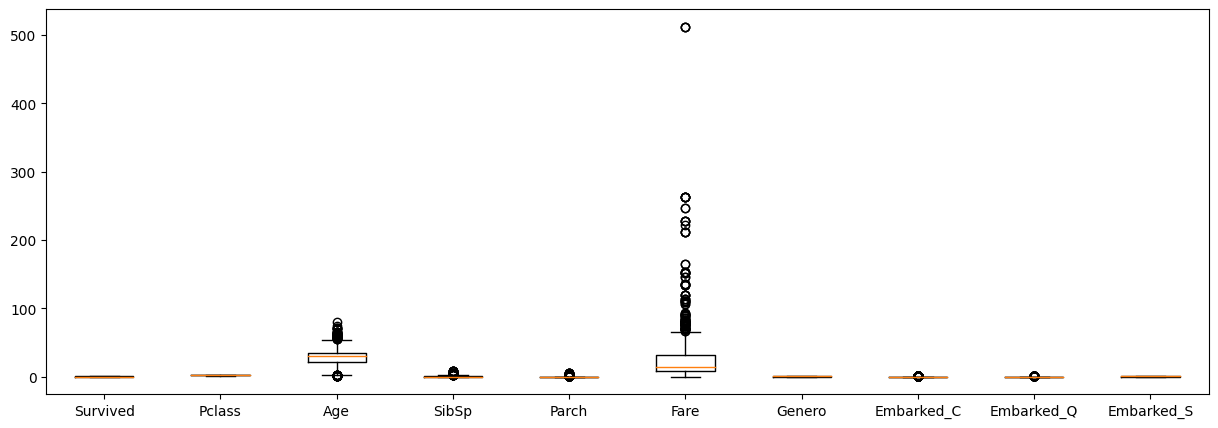

In [ ]:
#Visualizando a escada dos dados
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)
plt.show()



**As colunas Age e Fare estão com escala muito diferente das demais, usaremos o [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) para tratamento:**




In [ ]:
#Importação
from sklearn.preprocessing import RobustScaler

#Criar o Scaler / redimensionador
transformer = RobustScaler().fit(treino[['Age','Fare']])

#Realizando a transformação na base treino e atualizando as informações
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

#Criando transformador e realizando a transformação na base teste e atualizando as informações
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

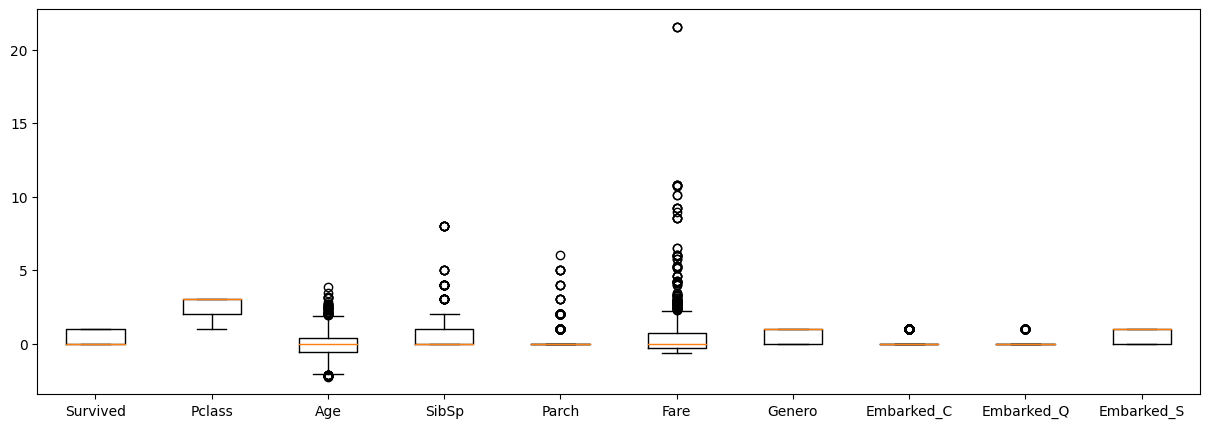

In [ ]:
#Visualizando os dados com a nova escala
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)
plt.show()

**Criação de modelos para classificação:**
*   1 - Precisamos dividir a base de treino em treino e validação com o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
*   2 - Vamos usar os seguintes classificadores:
    * [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html);
    * [K Vizinhos mais Próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html);
    * [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html);

In [ ]:
#Importar train_test_split
from sklearn.model_selection import train_test_split

#Separando base de treino em X e Y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
#Árvore de classificação:

#Importação
from sklearn import tree

#Criando cassificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

#Fit com os dados
clf_ac = clf_ac.fit(X_train, y_train)

#Realizando previsão
y_pred_ac = clf_ac.predict(X_val)

In [ ]:
#K Vizinhos mais próximos:

#Importação
from sklearn.neighbors import KNeighborsClassifier

#Criando cassificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

#Fit com os dados
clf_knn = clf_knn.fit(X_train, y_train)

#Realizando previsão

y_pred_knn = clf_knn.predict(X_val)

In [ ]:
#Regressão logística

#Importação
from sklearn.linear_model import LogisticRegression

#Criando cassificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

#Fit com os dados
clf_rl = clf_rl.fit(X_train, y_train)

#Realizando previsão
y_pred_rl = clf_rl.predict(X_val)

**Avaliando os modelos por:**
*   1 - [Acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   2 - [Matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
#Importação Acurácia:
from sklearn.metrics import accuracy_score

In [ ]:
#Árvore de classificação
acc_scr_ac = accuracy_score(y_val, y_pred_ac)
acc_scr_ac

0.7491525423728813

In [ ]:
#K Vizinhos mais próximos
acc_scr_knn = accuracy_score(y_val, y_pred_knn)
acc_scr_knn

0.8

In [ ]:
#Regressão Logística
acc_scr_rl = accuracy_score(y_val, y_pred_rl)
acc_scr_rl

0.8169491525423729

**Adicionando os novos valores de acurácia ao DF para comparação:**

In [ ]:
acc_scr_df['Ajuste de Escala'] = [acc_scr_ac, acc_scr_knn, acc_scr_rl]
acc_scr_df

,modelos,resultados iniciais,Ajuste de Escala
0,arvore,0.749153,0.749153
1,knn,0.715254,0.800000
2,reg. logistica,0.816949,0.816949


In [ ]:
#Importação Matriz de Confusão
from sklearn.metrics import confusion_matrix

In [ ]:
#Árvore de classificação
confusion_matrix(y_val, y_pred_ac)

array([[138,  37],
       [ 37,  83]])

In [ ]:
#K Vizinhos mais próximos
confusion_matrix(y_val, y_pred_knn)

array([[152,  23],
       [ 36,  84]])

In [ ]:
#Regressão Logística
confusion_matrix(y_val, y_pred_rl)

array([[153,  22],
       [ 32,  88]])

## **Analisando e manipulando as colunas SibSp e Parch**



**Podemos verificar quantas pessoas sobreviveram para cada valor das colunas:**
*   SibSp: irmãos/conjujes a bordo
*   Parch: pais/filhos a bordo



In [ ]:
#Verificando a média de sobrevivência de acordo com a coluna SibSP
treino.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

*   Vemos que em média, sobreviveram mais pessoas que estavam com 1 ou 2 acompanhantes


In [ ]:
#Criando dataframe com dados agregados por quantidade de acompanhantes, mostrando soma de sobreviventes, total de passageiros e taxa de sobrevivência
sibsp_df = treino.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
sibsp_df

,SibSp,sum,count,mean
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [ ]:
#Renomeando colunas
sibsp_df.columns = ['SibSp','Sobreviventes','Total','Tx_sobrev']
sibsp_df

,SibSp,Sobreviventes,Total,Tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


*   Das 608 pessoas viajando sem acompanhante, 210 sobreviveram
*   Das 209 pessoas viajando com 1 acompanhante, 112 sobreviveram
*   Das 28 pessoas viajando com 2 acompanhantes, 13 sobreviveram


In [ ]:
#Realizando a mesma análise para a coluna Parch
parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
parch_df.columns = ['Parch','Sobreviventes','Total','Tx_sobrev']
parch_df

,Parch,Sobreviventes,Total,Tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


*   Não foi possível identificar padrão de sobrevivência relacionado com os dados de Parch

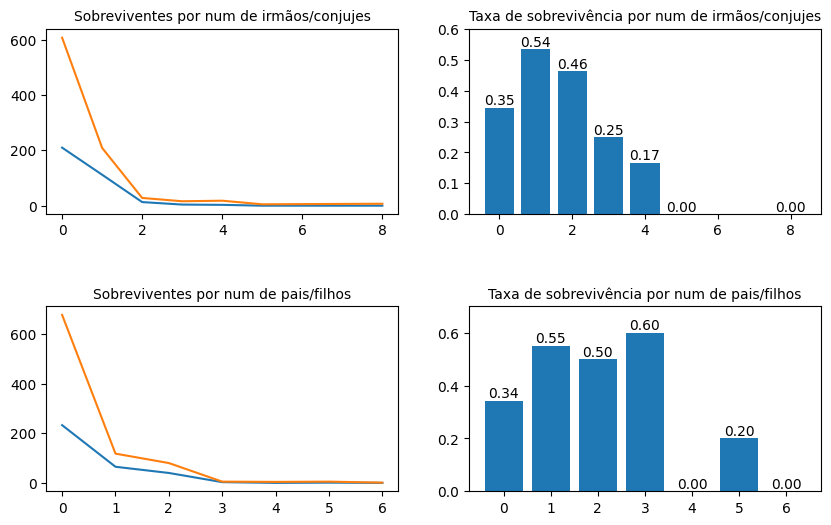

In [ ]:
#Visualização gráfica
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
ax[0,0].plot(sibsp_df.SibSp, sibsp_df.Sobreviventes)
ax[0,0].plot(sibsp_df.SibSp, sibsp_df.Total)
ax[0,0].set_title('Sobreviventes por num de irmãos/conjujes',fontsize=10)

labels1 = ax[0,1].bar(sibsp_df.SibSp, sibsp_df.Tx_sobrev)
ax[0,1].bar_label(labels1,fmt='%.02f')
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('Taxa de sobrevivência por num de irmãos/conjujes',fontsize=10)

ax[1,0].plot(parch_df.Parch, parch_df.Sobreviventes)
ax[1,0].plot(parch_df.Parch, parch_df.Total)
ax[1,0].set_title('Sobreviventes por num de pais/filhos',fontsize=10)

labels2 = ax[1,1].bar(parch_df.Parch, parch_df.Tx_sobrev)
ax[1,1].bar_label(labels2,fmt='%.02f')
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('Taxa de sobrevivência por num de pais/filhos',fontsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()

*   Comparando os resultados das 2 colunas, vemos que pessoas viajando sozinhas tem menor probabilidade de sobrevivência

**Podemos criar novas colunas:**
*   Identificando passageiros que viajam sozinhos
*   Somando os familiares a bordo

In [ ]:
#Função de identificação dos que viajam sozinhos
def sozinho (a,b):
    if (a ==0 and b ==0):
        return 1
    else:
        return 0

In [ ]:
#Aplicando função
treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [ ]:
#Verificando valores
treino.groupby('Sozinho')[['SibSp','Parch']].mean()

,SibSp,Parch
Sozinho,,
0,1.316384,0.960452
1,0.000000,0.000000


In [ ]:
#Realizando o mesmo procedimento na base teste
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)
teste.groupby('Sozinho')[['SibSp','Parch']].mean()

,SibSp,Parch
Sozinho,,
0,1.133333,0.993939
1,0.000000,0.000000


In [ ]:
#Somando os familiares a bordo
treino['Familiares'] = treino.SibSp + treino.Parch

In [ ]:
#Realizando o mesmo procedimento na base teste
teste['Familiares'] = teste.SibSp + teste.Parch

In [ ]:
#Verificando a sobrevivência de acordo com o número de familiares
familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()
familiares_df.columns = ['Familiares','Sobreviventes','Total','Tx_sobrev']
familiares_df

,Familiares,Sobreviventes,Total,Tx_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


*   Percebemos que pessoas viajando com até 3 acompanhantes tem maior taxa de sobrevivência

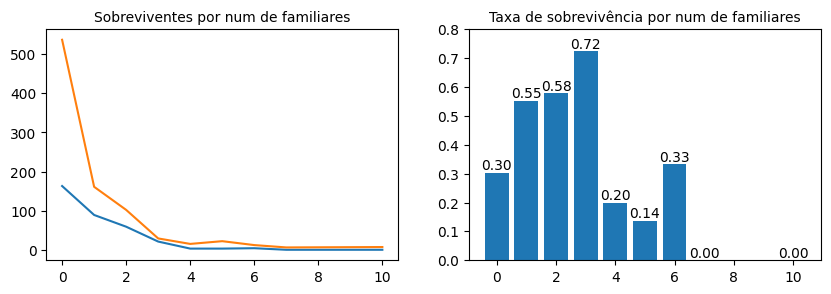

In [ ]:
#Visualização gráfica
fig, ax = plt.subplots(ncols=2,figsize=(10,3))
ax[0].plot(familiares_df.Familiares, familiares_df.Sobreviventes)
ax[0].plot(familiares_df.Familiares, familiares_df.Total)
ax[0].set_title('Sobreviventes por num de familiares',fontsize=10)

labels1 = ax[1].bar(familiares_df.Familiares, familiares_df.Tx_sobrev)
ax[1].bar_label(labels1,fmt='%.02f')
ax[1].set(ylim=(0,0.8))
ax[1].set_title('Taxa de sobrevivência por num de familiares',fontsize=10)

plt.subplots_adjust(hspace=0.5)
plt.show()

**Criação de modelos para classificação:**
*   1 - Precisamos dividir a base de treino em treino e validação com o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
*   2 - Vamos usar os seguintes classificadores:
    * [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html);
    * [K Vizinhos mais Próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html);
    * [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html);

In [ ]:
#Importar train_test_split
from sklearn.model_selection import train_test_split

#Separando base de treino em X e Y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
#Árvore de classificação:

#Importação
from sklearn import tree

#Criando cassificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

#Fit com os dados
clf_ac = clf_ac.fit(X_train, y_train)

#Realizando previsão
y_pred_ac = clf_ac.predict(X_val)

In [ ]:
#K Vizinhos mais próximos:

#Importação
from sklearn.neighbors import KNeighborsClassifier

#Criando cassificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

#Fit com os dados
clf_knn = clf_knn.fit(X_train, y_train)

#Realizando previsão

y_pred_knn = clf_knn.predict(X_val)

In [ ]:
#Regressão logística

#Importação
from sklearn.linear_model import LogisticRegression

#Criando cassificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

#Fit com os dados
clf_rl = clf_rl.fit(X_train, y_train)

#Realizando previsão
y_pred_rl = clf_rl.predict(X_val)

**Avaliando os modelos por:**
*   1 - [Acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   2 - [Matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
#Importação Acurácia:
from sklearn.metrics import accuracy_score

In [ ]:
#Árvore de classificação
acc_scr_ac = accuracy_score(y_val, y_pred_ac)
acc_scr_ac

0.735593220338983

In [ ]:
#K Vizinhos mais próximos
acc_scr_knn = accuracy_score(y_val, y_pred_knn)
acc_scr_knn

0.7864406779661017

In [ ]:
#Regressão Logística
acc_scr_rl = accuracy_score(y_val, y_pred_rl)
acc_scr_rl

0.8067796610169492

**Adicionando os novos valores de acurácia ao DF para comparação:**

In [ ]:
acc_scr_df['Acompanhantes'] = [acc_scr_ac, acc_scr_knn, acc_scr_rl]
acc_scr_df

,modelos,resultados iniciais,Ajuste de Escala,Acompanhantes
0,arvore,0.749153,0.749153,0.735593
1,knn,0.715254,0.800000,0.786441
2,reg. logistica,0.816949,0.816949,0.806780


In [ ]:
#Importação Matriz de Confusão
from sklearn.metrics import confusion_matrix

In [ ]:
#Árvore de classificação
confusion_matrix(y_val, y_pred_ac)

array([[135,  40],
       [ 38,  82]])

In [ ]:
#K Vizinhos mais próximos
confusion_matrix(y_val, y_pred_knn)

array([[153,  22],
       [ 41,  79]])

In [ ]:
#Regressão Logística
confusion_matrix(y_val, y_pred_rl)

array([[151,  24],
       [ 33,  87]])

## **Selecionando as melhores variáveis/recursos**

**Precisamos analizar a correlação entre variáveis**

In [ ]:
#Analizando a correlação
treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Genero,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.019336,0.179775,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
Genero,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,0.303646,-0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


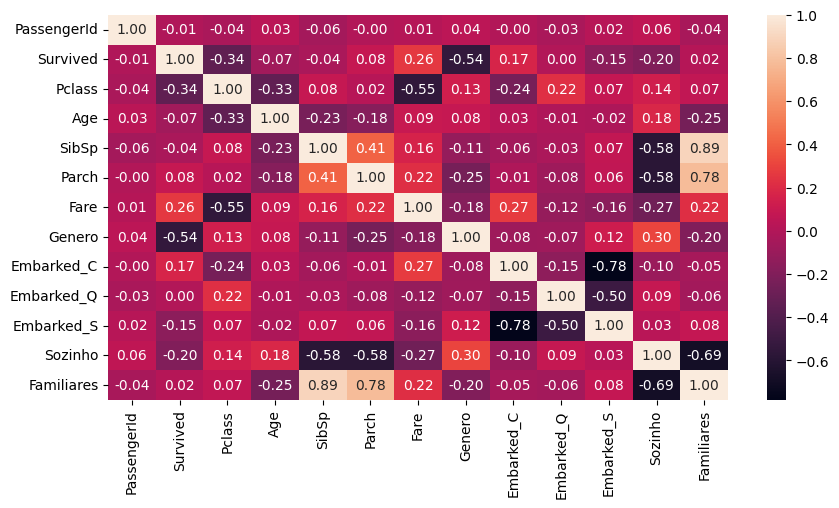

In [ ]:
#Visualização gráfica da correlação
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(treino.corr(), annot = True, fmt='.2f')
plt.show()

*   Percebemos forte correlação entre as colunas **Pclass** e **Fare**

**Colunas Pclass e Fare**


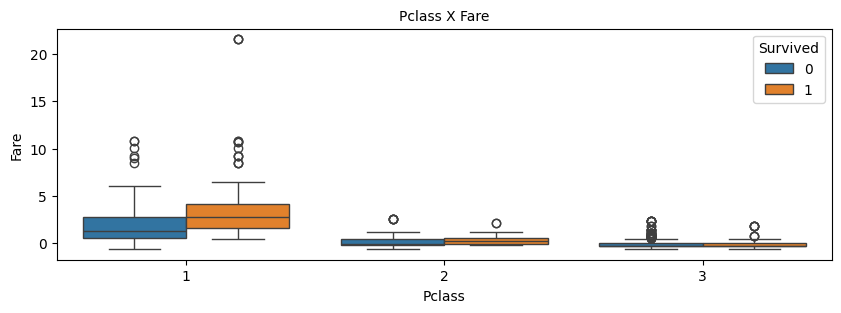

In [ ]:
#Visualizando a relação entre PClass e Fare, que parecem ter boa correlação
fig,ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=treino,x='Pclass',y='Fare',hue='Survived')
ax.set_title('Pclass X Fare', fontsize = 10)
plt.show()

*   Vemos que:
    *   Aparentemente quem pagou mais caro pela passagem (1a Classe) tem maior probabilidade de sobreviver (1);
    *   A probabilidade de sobrevivência da 2a e 3a Classe são muito próximos;
    *   Existem passagens da 1a Classe com preços próximos da 3a Classe.

In [ ]:
#Verificando taxa de sobrevivência por classe
treino.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

*   62% das pessoas da primeira classe sobreviveram

In [ ]:
#Verificando sobrevivência por classe e preço médio de passagem de cada classe
treino.groupby(['Pclass','Survived'])['Fare'].mean()

Pclass  Survived
1       0           2.175430
        1           3.514735
2       0           0.214734
        1           0.329217
3       0          -0.033991
        1          -0.032885
Name: Fare, dtype: float64

In [ ]:
#Verificando sobrevivência por classe agrupando preço médio, mínimo e máximo de passagem de cada classe
treino.groupby(['Pclass','Survived'])['Fare'].agg(['mean','min','max'])

mean       min        max
Pclass Survived                               
1      0         2.175430 -0.626005  10.764405
       1         3.514735  0.496977  21.562738
2      0         0.214734 -0.626005   2.557247
       1         0.329217 -0.171255   2.189115
3      0        -0.033991 -0.626005   2.386174
       1        -0.032885 -0.626005   1.820802

*   Tanto na 1a quanto na 2a classe, os sobreviventes (1) pagaram mais caro na passagem comparado aos passageiros que não sobreviveram (0);
*   Nota-se que os valores mínimos das 3 classes são iguais, e que há pouca diferença entre o valor máximo da 2a e 3a classe. Essa divisão de classes e preços pode ter ocorrido por:
    *   Classe social do passageiro;
    *   Divisão das cabines de acordo com os acompanhantes;
    *   Porto de embarque.


**Colunas de Embarque**
*   Inicialmente não parecia existir ordenação na informação de embarque, mas analisando a história do Titanic, vemos que são 3 portos distintos, e provavelmente o último porto de embarque tenha suas passagens mais baratas em relação ao primeiro:
    *   1o - Southampton
    *   2o - Cherbourg-Octeville
    *   3o - Queenstown

In [ ]:
#Recuperando a coluna de embarque
treino2 = pd.read_csv('train.csv')
treino2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Tratamento de valores vazios com a moda dessa coluna
treino2['Embarked'] = treino2['Embarked'].fillna('S')

Agora podemos ordenar de acordo com o local de embarque, usando o [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html):

In [ ]:
#Importando
from sklearn.preprocessing import OrdinalEncoder
#Criando encoder
categorias = ['S','C','Q']
enc = OrdinalEncoder(categories = [categorias],dtype='int32')
#Fit com os dados
enc.fit(treino2[['Embarked']])

OrdinalEncoder(categories=[['S', 'C', 'Q']], dtype='int32')

In [ ]:
#Adicionando coluna na base original
treino['Embarked'] = enc.transform(treino2[['Embarked']])

In [ ]:
#Agora o mesmo procedimento para a base de teste
teste2 = pd.read_csv('test.csv')
enc.fit(teste2[['Embarked']])
teste['Embarked'] = enc.transform(teste2[['Embarked']])

In [ ]:
#Eliminar colunas desnecessárias
treino = treino.drop(['Embarked_C','Embarked_S','Embarked_Q'],axis=1)
teste = teste.drop(['Embarked_C','Embarked_S','Embarked_Q'],axis=1)

In [ ]:
treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Genero,Sozinho,Familiares,Embarked
0,1,0,3,-0.592240,1,0,-0.312011,1,0,1,0
1,2,1,1,0.638529,1,0,2.461242,0,0,1,1
2,3,1,3,-0.284548,0,0,-0.282777,0,1,0,0
3,4,1,1,0.407760,1,0,1.673732,0,0,1,0
4,5,0,3,0.407760,0,0,-0.277363,1,1,0,0


In [ ]:
teste.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Genero,Sozinho,Familiares,Embarked
0,892,3,0.331562,0,0,-0.280670,1,1,0,2
1,893,3,1.311954,1,0,-0.315800,0,0,1,0
2,894,2,2.488424,0,0,-0.201943,1,1,0,2
3,895,3,-0.256674,0,0,-0.245367,1,1,0,0
4,896,3,-0.648831,1,1,-0.091793,0,0,2,0


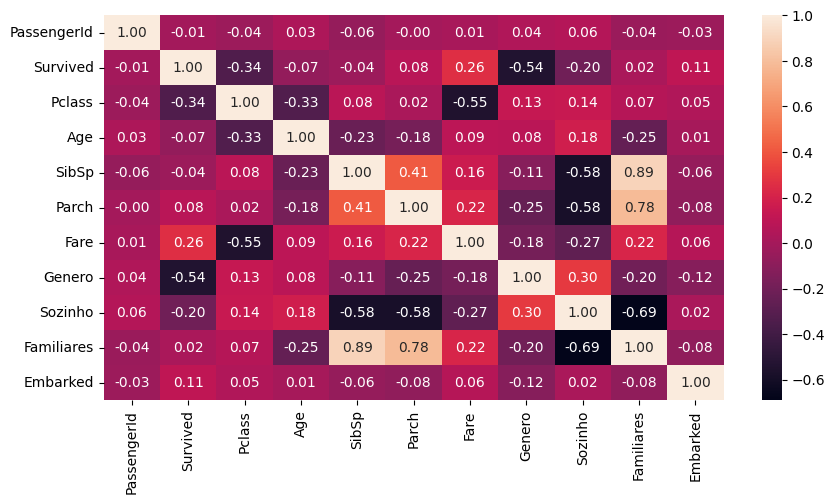

In [ ]:
#Visualização gráfica da correlação
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(treino.corr(), annot = True, fmt='.2f')
plt.show()

**Colunas de Familia**
*   Usando [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), podemos verificar a importância dessas colunas, para saber se devem ser mantidas ou se podemos aliminá-las da análise
*   Faremos isso de maneira rápida para uma análise ágil, caso haja overfitting, podemos tratar mais tarde.

In [ ]:
#Separando X e y
X = treino.drop(['PassengerId','Survived'],axis = 1)
y = treino.Survived

*   *   **X** = a base completa, excluindo a coluna que precisa ser prevista;
        *   Retiramos a coluna **PassengerID** para que não atrapalhe na previsão, não eliminamos ela da base pois será necessária no momento de submissão ao Kaggle.
    *   **y** = coluna que precisa ser prevista;

In [ ]:
#Usando Regrassão Logística
clf_rl = LogisticRegression(random_state=42,max_iter=1000).fit(X,y)

In [ ]:
#Verificando a importância
clf_rl.coef_[0]

array([-1.03314773, -0.49645712, -0.26819737,  0.01690958,  0.04398615,
       -2.5345877 , -0.73233826, -0.25128778,  0.23866778])

In [ ]:
#Usando árvore de classificação
clf_ac = tree.DecisionTreeClassifier(random_state=42).fit(X,y)

In [ ]:
#Verificando a importância
clf_ac.feature_importances_

array([0.10901775, 0.22826711, 0.01907221, 0.0272942 , 0.23870173,
       0.30933519, 0.00397775, 0.04365035, 0.02068372])

In [ ]:
#Criando DF para análise e comparação
importancia = pd.DataFrame({
    'colunas': X.columns,
    'regrassao logistica': clf_rl.coef_[0],
    'arvore class': clf_ac.feature_importances_
})
importancia

,colunas,regrassao logistica,arvore class
0,Pclass,-1.033148,0.109018
1,Age,-0.496457,0.228267
2,SibSp,-0.268197,0.019072
3,Parch,0.016910,0.027294
4,Fare,0.043986,0.238702
5,Genero,-2.534588,0.309335
6,Sozinho,-0.732338,0.003978
7,Familiares,-0.251288,0.043650
8,Embarked,0.238668,0.020684


*   As colunas **SibSp** e **Parch** tem valores baixos de importância, e seus conteúdos são contemplados pelas colunas **Familiares** e **Sozinho**, por isso, podem ser eliminadas

In [ ]:
#Manter colunas mais relevantes
treino = treino.drop(['SibSp','Parch'],axis=1)
teste = teste.drop(['SibSp','Parch'],axis=1)

**Criação de modelos para classificação:**
*   1 - Precisamos dividir a base de treino em treino e validação com o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);
*   2 - Vamos usar os seguintes classificadores:
    * [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html);
    * [K Vizinhos mais Próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html);
    * [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html);

In [ ]:
#Importar train_test_split
from sklearn.model_selection import train_test_split

#Separando base de treino em X e Y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
#Árvore de classificação:

#Importação
from sklearn import tree

#Criando cassificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

#Fit com os dados
clf_ac = clf_ac.fit(X_train, y_train)

#Realizando previsão
y_pred_ac = clf_ac.predict(X_val)

In [ ]:
#K Vizinhos mais próximos:

#Importação
from sklearn.neighbors import KNeighborsClassifier

#Criando cassificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

#Fit com os dados
clf_knn = clf_knn.fit(X_train, y_train)

#Realizando previsão

y_pred_knn = clf_knn.predict(X_val)

In [ ]:
#Regressão logística

#Importação
from sklearn.linear_model import LogisticRegression

#Criando cassificador
clf_rl = LogisticRegression(random_state=42,max_iter=1000)

#Fit com os dados
clf_rl = clf_rl.fit(X_train, y_train)

#Realizando previsão
y_pred_rl = clf_rl.predict(X_val)

**Avaliando os modelos por:**
*   1 - [Acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
*   2 - [Matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
#Importação Acurácia:
from sklearn.metrics import accuracy_score

In [ ]:
#Árvore de classificação
acc_scr_ac = accuracy_score(y_val, y_pred_ac)
acc_scr_ac

0.7627118644067796

In [ ]:
#K Vizinhos mais próximos
acc_scr_knn = accuracy_score(y_val, y_pred_knn)
acc_scr_knn

0.7864406779661017

In [ ]:
#Regressão Logística
acc_scr_rl = accuracy_score(y_val, y_pred_rl)
acc_scr_rl

0.8101694915254237

**Adicionando os novos valores de acurácia ao DF para comparação:**

In [ ]:
acc_scr_df['alta correlacao'] = [acc_scr_ac, acc_scr_knn, acc_scr_rl]
acc_scr_df

,modelos,resultados iniciais,Ajuste de Escala,Acompanhantes,alta correlacao
0,arvore,0.749153,0.749153,0.735593,0.762712
1,knn,0.715254,0.800000,0.786441,0.786441
2,reg. logistica,0.816949,0.816949,0.806780,0.810169


In [ ]:
#Importação Matriz de Confusão
from sklearn.metrics import confusion_matrix

In [ ]:
#Árvore de classificação
confusion_matrix(y_val, y_pred_ac)

array([[142,  33],
       [ 37,  83]])

In [ ]:
#K Vizinhos mais próximos
confusion_matrix(y_val, y_pred_knn)

array([[149,  26],
       [ 37,  83]])

In [ ]:
#Regressão Logística
confusion_matrix(y_val, y_pred_rl)

array([[154,  21],
       [ 35,  85]])

**Fazendo previsão na base teste:**
*   Usaremos o modelo com melhor precisão para fazer a previsão (predict)

In [ ]:
#Visualizando o X_train
X_train.head()

,Pclass,Age,Fare,Genero,Sozinho,Familiares,Embarked
6,1,1.869299,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.361471,1.174771,1,0,3,1
73,3,-0.284548,0.000000,1,0,1,1
882,3,-0.592240,-0.170531,0,1,0,0


In [ ]:
##Visualizando somente as colunas com valores numéricos da base teste
teste.head()

,PassengerId,Pclass,Age,Fare,Genero,Sozinho,Familiares,Embarked
0,892,3,0.331562,-0.280670,1,1,0,2
1,893,3,1.311954,-0.315800,0,0,1,0
2,894,2,2.488424,-0.201943,1,1,0,2
3,895,3,-0.256674,-0.245367,1,1,0,0
4,896,3,-0.648831,-0.091793,0,0,2,0


In [ ]:
#Eliminar coluna ID para que a base teste seja igual a base treino
X_teste = teste.drop(['PassengerId'], axis=1)

In [ ]:
#Aplicando regrassão logística
y_pred = clf_rl.predict(X_teste)

In [ ]:
#Criando coluna com a previsão na base teste
teste['Survived'] = y_pred

In [ ]:
#Selecionando colunas de interesse para fazer envio ao Kaggle
envio_kaggle = teste[['PassengerId','Survived']]

In [ ]:
#Exportando .csv
envio_kaggle.to_csv('resultados_parte03_1.csv',index=False)

Resultado da submissão: **0.77751**